In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
google_colab = input('Running on Colab?\n')
if google_colab == 'yes' : 
    BASE_DIR = 'University/UC3M/TFM/cnp_repo/neural-processes'

    # Load the Drive helper and mount
    from google.colab import drive

    # This will prompt for authorization.
    drive.mount('/content/drive')

      # Change to assignment directory ('Lab_Exercises_DASS/Lab_Exercise4' by default)
    import os
    os.chdir(f'/content/drive/My Drive/{BASE_DIR}')
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')
    os.chdir(BASE_DIR)

    
# custom imports
from cnp.trainer import RegressionTrainer
from cnp.datageneration import DataGenerator
from cnp.helpers import Helper
from cnp.cnp import RegressionCNP

import torch
import numpy as np

# import utils
import json
from datetime import date

Running on Colab?
no
Top level directory is set to /Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes


In [3]:

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']

if google_colab=='yes':
    config_dir = 'configs'
else:
    config_dir = os.path.join(BASE_DIR,'configs')

with open(os.path.join(config_dir,'1dpolynomial_fixedcontxt_mlpaggr.json')) as f:
    file = f.read()
    default_conf = json.loads(file)



In [4]:
default_conf

{'cnp_params': {'dimout': 2,
  'dimr': 128,
  'dimx': 1,
  'dimy': 1,
  'dropout': 0,
  'max_contx': 10,
  'max_funcs': 10,
  'min_contx': 3,
  'min_funcs': 2,
  'fix_num_contxt': True,
  'num_layers_decoder': 3,
  'num_layers_encoder': 4,
  'num_neurons_decoder': 128,
  'num_neurons_encoder': 128,
  'aggregation_kwargs': {'aggregator': 'MLPAggregator',
   'insize': 5,
   'dimout': 1,
   'num_layers': 2,
   'num_neurons': 20,
   'padding': False}},
 'data_kwargs': {'datagenerator': 'cnp.datageneration.PolynomialRegression',
  'mu': 0,
  'sigma': 2,
  'num_instances_train': 64,
  'num_instances_vali': 1,
  'num_instances_test': 1},
 'experiment_params': {'dim_observation': 50,
  'lr': 0.001,
  'n_epochs': 10000,
  'range_x': [-2, 2],
  'seed': None,
  'dimx': 1,
  'train_on_gpu': False},
 'train_kwargs': {'batch_size_train': 64,
  'batch_size_vali': 1,
  'batch_size_test': 1,
  'plotting': True,
  'print_after': 100}}

In [5]:

# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    default_conf['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    default_conf['experiment_params']['train_on_gpu'] = False

No GPU available, training on CPU


## Generating data on the fly from a simple function.

In [6]:
default_conf.keys()

dict_keys(['cnp_params', 'data_kwargs', 'experiment_params', 'train_kwargs'])

In [7]:
CondNeuralProcess = RegressionCNP(**default_conf['cnp_params'])

In [8]:
CondNeuralProcess._sample_specs_kwargs

{'min_trgts': 2,
 'max_trgts': 10,
 'max_contx': 10,
 'min_contx': 3,
 'fix_num_contxt': True}

In [9]:
trainer = RegressionTrainer(
    cnp=CondNeuralProcess,
    data_kwargs=default_conf['data_kwargs'],
    **default_conf['experiment_params'])
                         

In [10]:
default_conf['train_kwargs']

{'batch_size_train': 64,
 'batch_size_vali': 1,
 'batch_size_test': 1,
 'plotting': True,
 'print_after': 100}

  0%|          | 0/10000 [00:00<?, ?it/s]

Mean training loss at epoch 0 :                         73.366
Mean Validation loss after 0 equals                     71.783

Validation loss for the function plotted:                 71.783


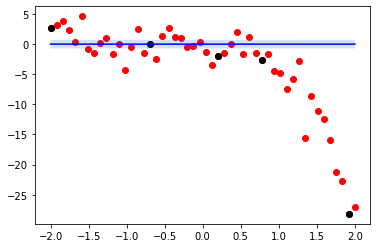

  1%|          | 97/10000 [00:01<02:53, 57.15it/s]

Mean training loss at epoch 100 :                         3.047
Mean Validation loss after 100 equals                     3.895

Validation loss for the function plotted:                 3.895


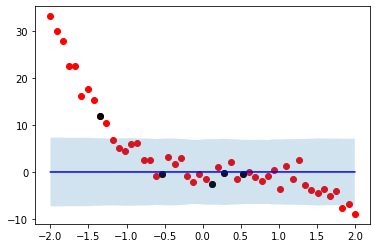

  2%|▏         | 195/10000 [00:03<02:30, 64.98it/s]

Mean training loss at epoch 200 :                         3.785
Mean Validation loss after 200 equals                     3.73

Validation loss for the function plotted:                 3.73


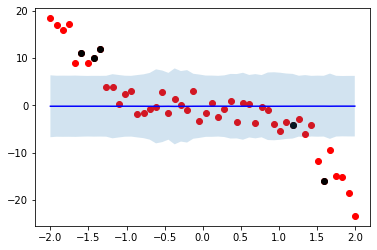

  3%|▎         | 300/10000 [00:05<02:32, 63.81it/s]

Mean training loss at epoch 300 :                         3.144
Mean Validation loss after 300 equals                     3.942

Validation loss for the function plotted:                 3.942


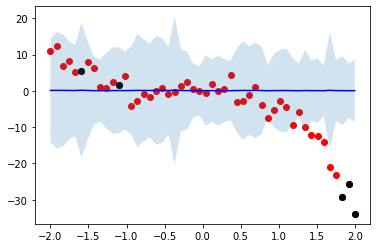

  4%|▍         | 400/10000 [00:07<03:17, 48.56it/s]

Mean training loss at epoch 400 :                         2.917
Mean Validation loss after 400 equals                     3.146

Validation loss for the function plotted:                 3.146


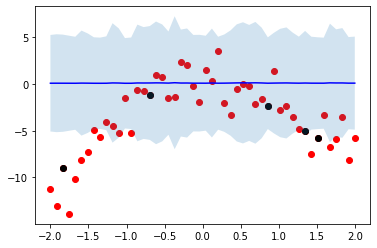

  5%|▍         | 498/10000 [00:09<04:01, 39.34it/s]

Mean training loss at epoch 500 :                         3.079
Mean Validation loss after 500 equals                     3.16

Validation loss for the function plotted:                 3.16


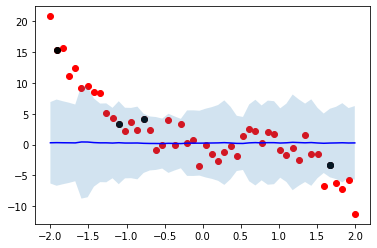

  6%|▌         | 598/10000 [00:11<03:37, 43.24it/s]

Mean training loss at epoch 600 :                         3.311
Mean Validation loss after 600 equals                     4.016

Validation loss for the function plotted:                 4.016


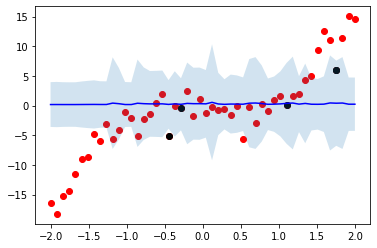

  7%|▋         | 700/10000 [00:13<02:43, 56.95it/s]

Mean training loss at epoch 700 :                         3.577
Mean Validation loss after 700 equals                     2.765

Validation loss for the function plotted:                 2.765


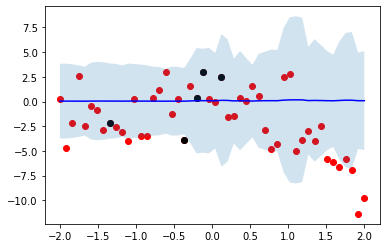

  8%|▊         | 800/10000 [00:16<03:14, 47.24it/s]

Mean training loss at epoch 800 :                         3.561
Mean Validation loss after 800 equals                     4.847

Validation loss for the function plotted:                 4.847


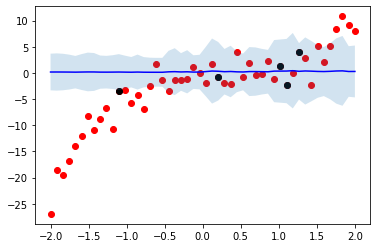

  9%|▉         | 886/10000 [00:17<02:38, 57.61it/s]

In [ ]:
state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss = trainer.run_training(
    batch_size_train=default_conf['train_kwargs']['batch_size_train'],
    batch_size_vali=default_conf['train_kwargs']['batch_size_vali'],
    print_after=default_conf['train_kwargs']['print_after'])

In [27]:
dict(state_dict_aggregator).keys()

dict_keys(['_process_input.0.weight', '_process_input.0.bias', '_process_input.2.weight', '_process_input.2.bias'])

In [35]:
list(trainer._cnp.aggregator.parameters())[0][0]

tensor([-0.4534,  0.4824,  0.1151,  0.2976,  0.3037], grad_fn=<SelectBackward>)

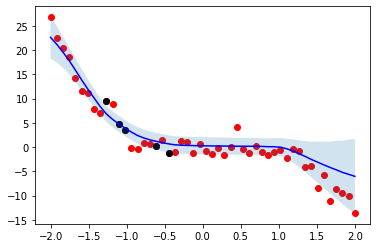

6.354636192321777


In [48]:
MSE = trainer.run_test(encoder_state_dict=state_dict_encoder,
              decoder_state_dict=state_dict_decoder,
              aggregator_state_dict=state_dict_aggregator,
              batch_size_test=default_conf['multiple_functions']['train_kwargs']['batch_size_test'])
print(MSE)

In [78]:
values = [state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss]
names = ['encoder', 'decoder', 'aggregator', 'train_loss', 'vali_loss', 'mse']
to_save = [(name, value) for name, value in zip(names, values)]
directory = os.path.join(BASE_DIR,'experiments/results')


Helper.save_results(directory, 'testing', to_save)

## Regular Regression Use Case  - Learning from a single function

In [79]:
with open(os.path.join(config_dir,'1d_singlefunc_config.json')) as f:
    file = f.read()
    default_conf = json.loads(file)

In [80]:
default_conf['single_function']['data_kwargs']['data_path'] = os.path.join(
    BASE_DIR,
    default_conf['single_function']['data_kwargs']['datafile'])

In [81]:
CondNeuralProcess = RegressionCNP(**default_conf['single_function']['cnp_params'])

{'aggregator': 'MLPAggregator', 'insize': 10, 'dimout': 1, 'num_layers': 2, 'num_neurons': 128}


In [82]:
trainer = RegressionTrainer(
    cnp=CondNeuralProcess,
    data_kwargs=default_conf['single_function']['data_kwargs'],
    **default_conf['single_function']['experiment_params'])
                         

  0%|          | 0/10000 [00:00<?, ?it/s]

Mean training loss at epoch 0 :                         13.537
Mean Validation loss after 0 equals                     4.375

Validation loss for the function plotted:                 4.378


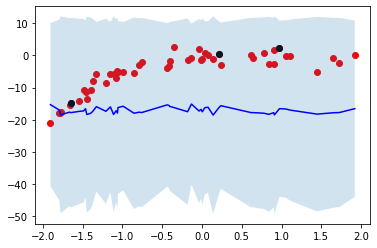

  1%|          | 100/10000 [00:04<07:03, 23.39it/s]

Mean training loss at epoch 100 :                         3.188
Mean Validation loss after 100 equals                     3.356

Validation loss for the function plotted:                 3.263


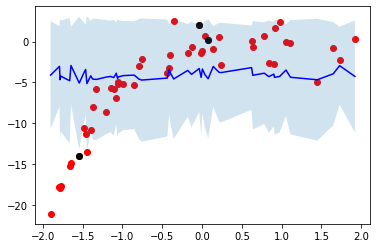

  2%|▏         | 198/10000 [00:08<06:30, 25.12it/s]

Mean training loss at epoch 200 :                         10.335
Mean Validation loss after 200 equals                     10.388

Validation loss for the function plotted:                 10.374


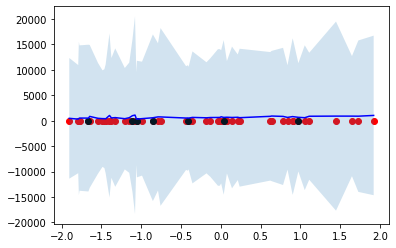

  3%|▎         | 300/10000 [00:13<07:03, 22.91it/s]

Mean training loss at epoch 300 :                         11.319
Mean Validation loss after 300 equals                     11.453

Validation loss for the function plotted:                 11.237


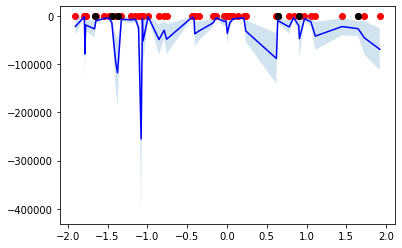

  4%|▍         | 399/10000 [00:17<06:49, 23.46it/s]

Mean training loss at epoch 400 :                         11.138
Mean Validation loss after 400 equals                     11.277

Validation loss for the function plotted:                 10.993


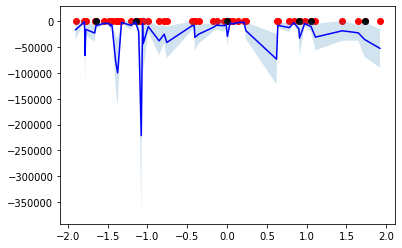

  5%|▍         | 499/10000 [00:22<07:28, 21.16it/s]

Mean training loss at epoch 500 :                         11.41
Mean Validation loss after 500 equals                     10.422

Validation loss for the function plotted:                 10.425


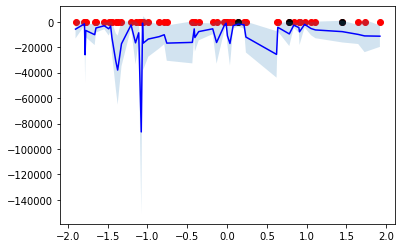

  6%|▌         | 598/10000 [00:27<06:11, 25.28it/s]

Mean training loss at epoch 600 :                         10.991
Mean Validation loss after 600 equals                     10.875

Validation loss for the function plotted:                 10.397


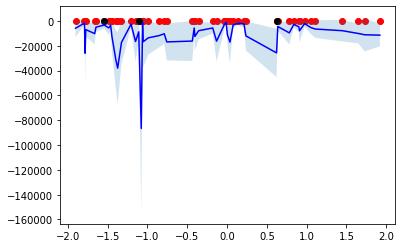

  7%|▋         | 700/10000 [00:31<06:16, 24.72it/s]

Mean training loss at epoch 700 :                         11.065
Mean Validation loss after 700 equals                     10.794

Validation loss for the function plotted:                 10.908


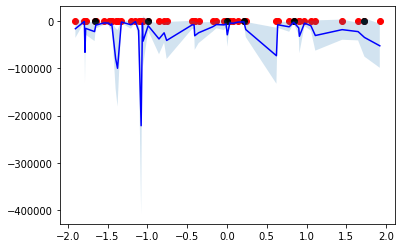

  8%|▊         | 799/10000 [00:35<06:39, 23.03it/s]

Mean training loss at epoch 800 :                         11.243
Mean Validation loss after 800 equals                     10.637

Validation loss for the function plotted:                 10.678


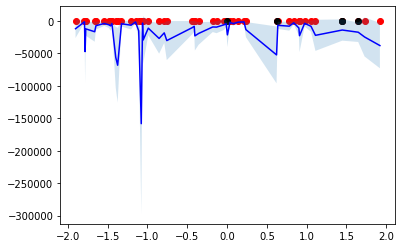

  9%|▉         | 898/10000 [00:40<06:35, 23.02it/s]

Mean training loss at epoch 900 :                         11.216
Mean Validation loss after 900 equals                     10.481

Validation loss for the function plotted:                 10.37


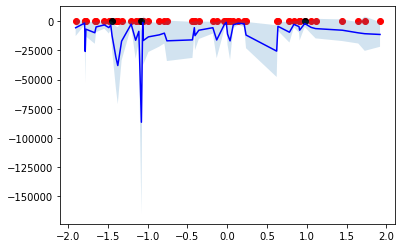

 10%|█         | 1000/10000 [00:44<05:57, 25.16it/s]

Mean training loss at epoch 1000 :                         11.55
Mean Validation loss after 1000 equals                     10.812

Validation loss for the function plotted:                 10.591


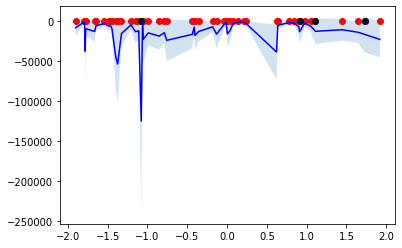

 11%|█         | 1099/10000 [00:48<06:17, 23.56it/s]

Mean training loss at epoch 1100 :                         11.277
Mean Validation loss after 1100 equals                     10.734

Validation loss for the function plotted:                 10.587


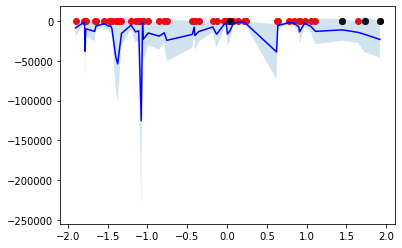

 12%|█▏        | 1198/10000 [00:53<05:52, 24.97it/s]

Mean training loss at epoch 1200 :                         11.089
Mean Validation loss after 1200 equals                     10.952

Validation loss for the function plotted:                 11.028


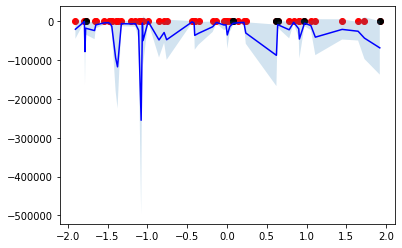

 13%|█▎        | 1300/10000 [00:57<06:02, 23.99it/s]

Mean training loss at epoch 1300 :                         11.036
Mean Validation loss after 1300 equals                     10.724

Validation loss for the function plotted:                 10.875


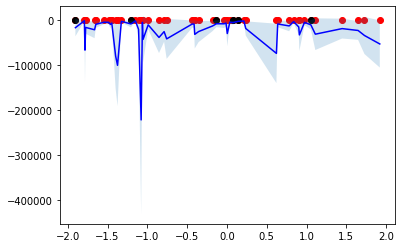

 14%|█▍        | 1398/10000 [01:01<06:41, 21.40it/s]

Mean training loss at epoch 1400 :                         10.929
Mean Validation loss after 1400 equals                     10.983

Validation loss for the function plotted:                 10.646


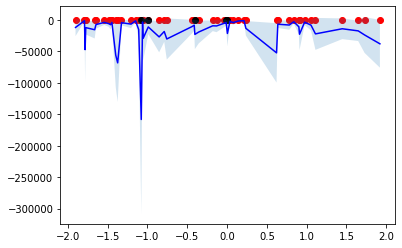

 15%|█▌        | 1500/10000 [01:06<06:32, 21.66it/s]

Mean training loss at epoch 1500 :                         10.934
Mean Validation loss after 1500 equals                     11.445

Validation loss for the function plotted:                 11.447


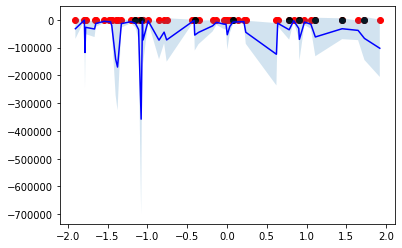

 16%|█▌        | 1599/10000 [01:10<05:35, 25.04it/s]

Mean training loss at epoch 1600 :                         10.926
Mean Validation loss after 1600 equals                     11.144

Validation loss for the function plotted:                 11.437


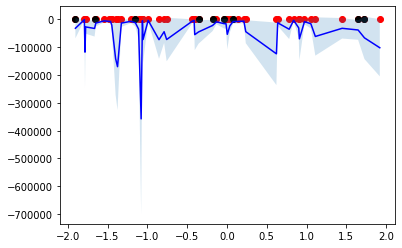

 17%|█▋        | 1698/10000 [01:14<05:28, 25.24it/s]

Mean training loss at epoch 1700 :                         11.125
Mean Validation loss after 1700 equals                     10.965

Validation loss for the function plotted:                 11.312


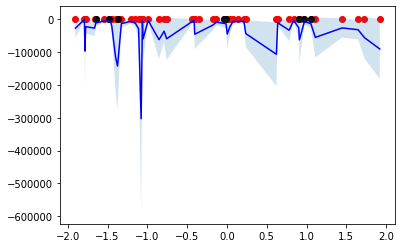

 18%|█▊        | 1800/10000 [01:19<05:32, 24.66it/s]

Mean training loss at epoch 1800 :                         11.489
Mean Validation loss after 1800 equals                     11.202

Validation loss for the function plotted:                 11.405


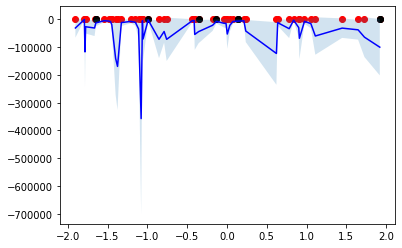

 19%|█▉        | 1899/10000 [01:23<05:14, 25.75it/s]

Mean training loss at epoch 1900 :                         10.919
Mean Validation loss after 1900 equals                     10.676

Validation loss for the function plotted:                 10.822


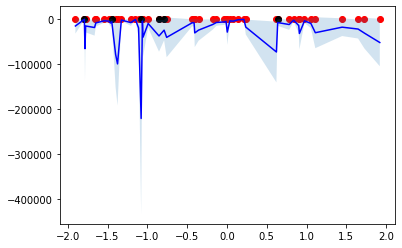

 20%|█▉        | 1998/10000 [01:27<05:40, 23.52it/s]

Mean training loss at epoch 2000 :                         11.036
Mean Validation loss after 2000 equals                     10.942

Validation loss for the function plotted:                 11.279


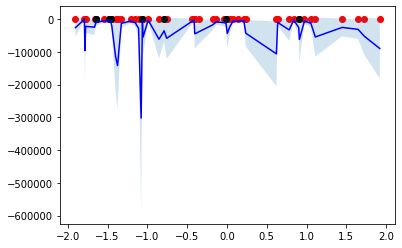

 21%|██        | 2100/10000 [01:32<05:07, 25.73it/s]

Mean training loss at epoch 2100 :                         10.468
Mean Validation loss after 2100 equals                     10.59

Validation loss for the function plotted:                 10.922


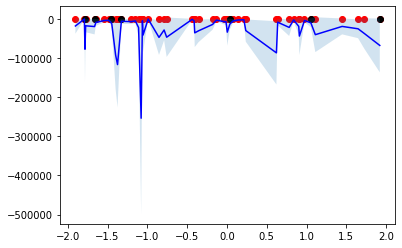

 22%|██▏       | 2199/10000 [01:36<06:12, 20.93it/s]

Mean training loss at epoch 2200 :                         12.081
Mean Validation loss after 2200 equals                     12.108

Validation loss for the function plotted:                 12.096


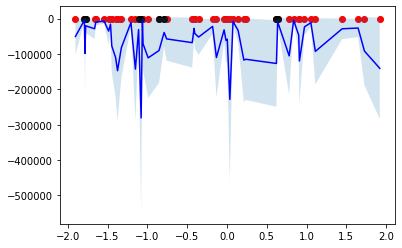

 23%|██▎       | 2298/10000 [01:40<05:19, 24.13it/s]

Mean training loss at epoch 2300 :                         11.943
Mean Validation loss after 2300 equals                     11.839

Validation loss for the function plotted:                 12.089


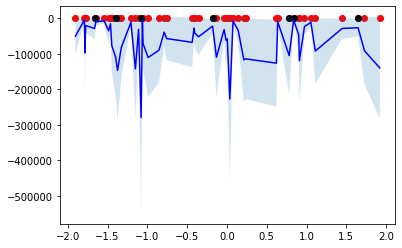

 24%|██▍       | 2400/10000 [01:45<05:24, 23.44it/s]

Mean training loss at epoch 2400 :                         11.954
Mean Validation loss after 2400 equals                     11.146

Validation loss for the function plotted:                 10.979


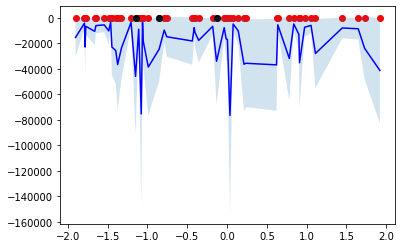

 25%|██▍       | 2499/10000 [01:49<05:16, 23.68it/s]

Mean training loss at epoch 2500 :                         12.172
Mean Validation loss after 2500 equals                     11.608

Validation loss for the function plotted:                 11.917


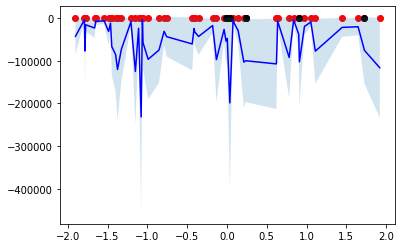

 26%|██▌       | 2556/10000 [01:52<05:13, 23.76it/s]

In [ ]:
state_dict_encoder, state_dict_decoder, state_dict_aggregator = trainer.run_training(
    batch_size_train=default_conf['single_function']['train_kwargs']['batch_size_train'],
    batch_size_vali=default_conf['single_function']['train_kwargs']['batch_size_vali'],
    print_after=default_conf['single_function']['train_kwargs']['print_after'])

In [47]:
default_conf['single_function']['data_kwargs']['datagenerator']